### Clean the previous plot

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from upsetplot import UpSet, from_contents
import seaborn as sns
from matplotlib_venn import venn2
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib.patches import Patch

In [56]:
sns.set_theme(font_scale=1.4, style='whitegrid')

In [24]:
df = pd.read_csv('../Data/Network_GRN_HIVE_curated.txt', sep='\t')

/tmp/ipykernel_60453/2203416845.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(plot_df["Category"].unique(), fontsize=20)


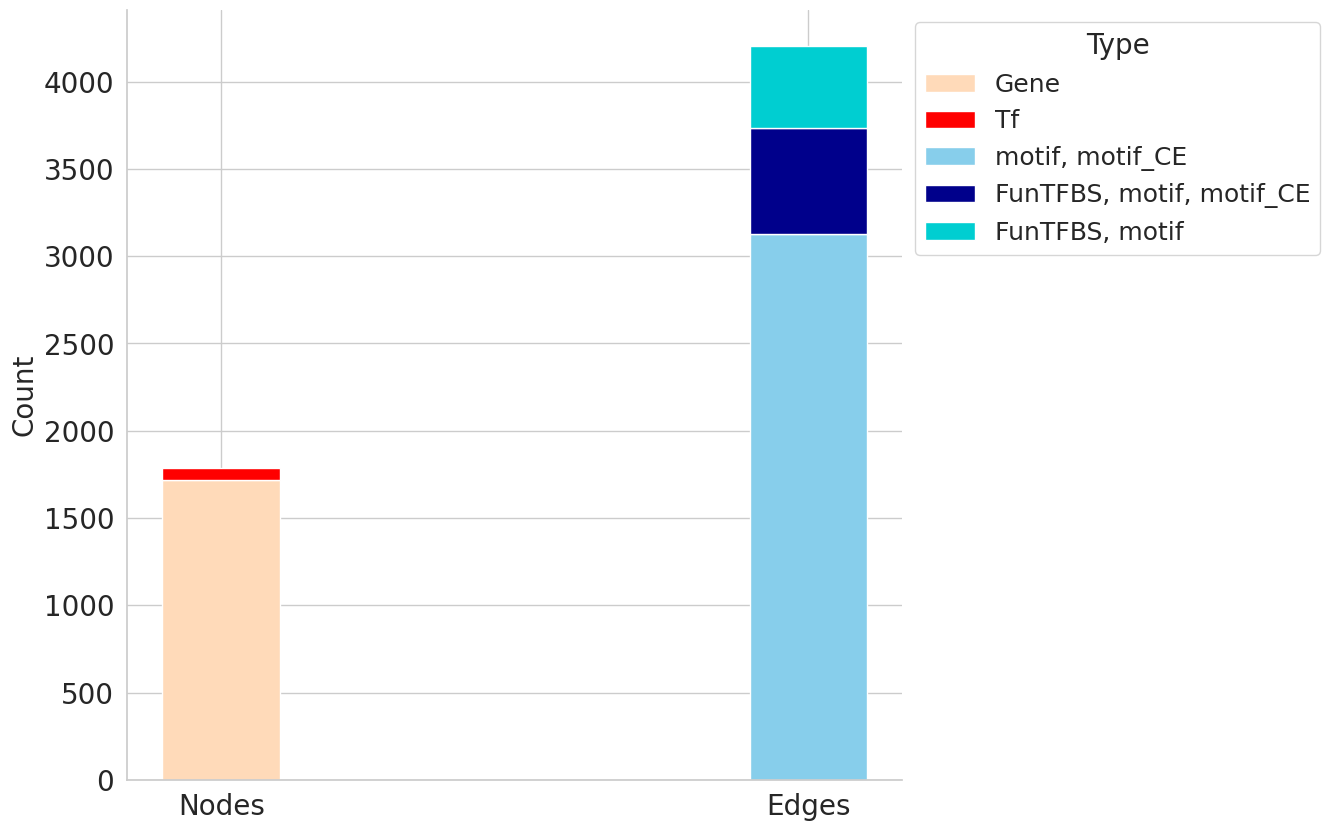

In [25]:
# Count nodes
tf_nodes = set(df["tf.name"])
target_nodes = set(df["target.name"])
genes = target_nodes - tf_nodes  # Targets that are NOT TFs

node_counts = pd.DataFrame({
    "Category": "Nodes",
    "Type": ["Gene", "Tf"],
    "Count": [len(genes), len(tf_nodes)]
})

# Count edges (without splitting evidence)
edge_counts = df["reg.evidence"].value_counts().reset_index()
edge_counts.columns = ["Type", "Count"]
edge_counts["Category"] = "Edges"

# Combine for plotting
plot_df = pd.concat([node_counts, edge_counts])

colors = {'Tf':'red', 'Gene':'peachpuff', 'motif, motif_CE':'skyblue', 'FunTFBS, motif, motif_CE':'darkblue','FunTFBS, motif':'darkturquoise'}

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

bottoms = {"Nodes": 0, "Edges": 0}

for _, row in plot_df.iterrows():
    color = colors.get(row["Type"], "gray")
    ax.bar(
        row["Category"], row["Count"], label=row["Type"],
        bottom=bottoms[row["Category"]], color=color, width=0.2,
    )
    bottoms[row["Category"]] += row["Count"]

ax.set_ylabel("Count", fontsize=20)
ax.set_xticklabels(plot_df["Category"].unique(), fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


# Ensure only unique legend entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title="Type", loc="upper left", bbox_to_anchor=(1, 1), fontsize=18, title_fontsize=20)

# plt.savefig('./Results/Clean_plot/GRN_Description.svg', bbox_inches='tight', format='svg')
plt.show()

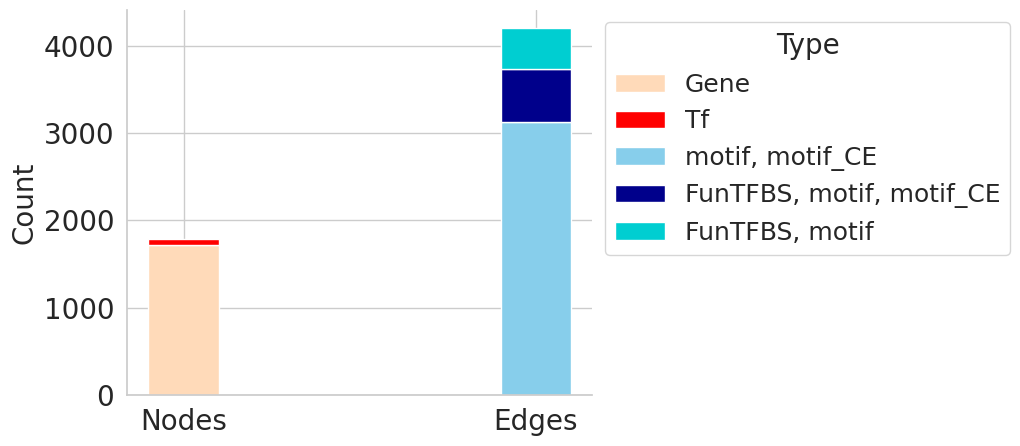

In [26]:
# Count nodes
tf_nodes = set(df["tf.name"])
target_nodes = set(df["target.name"])
genes = target_nodes - tf_nodes  # Targets that are NOT TFs

node_counts = pd.DataFrame({
    "Category": "Nodes",
    "Type": ["Gene", "Tf"],
    "Count": [len(genes), len(tf_nodes)]
})

# Count edges (without splitting evidence)
edge_counts = df["reg.evidence"].value_counts().reset_index()
edge_counts.columns = ["Type", "Count"]
edge_counts["Category"] = "Edges"

# Combine for plotting
plot_df = pd.concat([node_counts, edge_counts])

colors = {'Tf':'red', 'Gene':'peachpuff', 'motif, motif_CE':'skyblue', 'FunTFBS, motif, motif_CE':'darkblue','FunTFBS, motif':'darkturquoise'}

# Define category positions
category_positions = {"Nodes": 0, "Edges": 0.5}  # Reduce spacing

fig, ax = plt.subplots(figsize=(6, 5))

bottoms = {"Nodes": 0, "Edges": 0}

for _, row in plot_df.iterrows():
    color = colors.get(row["Type"], "gray")
    ax.bar(
        category_positions[row["Category"]], row["Count"], label=row["Type"],
        bottom=bottoms[row["Category"]], color=color, width=0.1,  # Adjust width
    )
    bottoms[row["Category"]] += row["Count"]

# Set category labels at custom positions
ax.set_xticks([category_positions["Nodes"], category_positions["Edges"]])
ax.set_xticklabels(["Nodes", "Edges"], fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)


# Ensure only unique legend entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title="Type", loc="upper left", bbox_to_anchor=(1, 1), fontsize=18, title_fontsize=20)

plt.savefig('./Fig2_A.svg', bbox_inches='tight', format='svg')
plt.show()

In [27]:
pd.concat([df['tf.name'], df['target.name']]).unique().shape

(1786,)

In [28]:
df['reg.evidence'].value_counts()

reg.evidence
motif, motif_CE             3127
FunTFBS, motif, motif_CE     608
FunTFBS, motif               466
Name: count, dtype: int64

In [29]:
# # Count TFs and Targets separately
# tf_count = df['tf.name'].nunique()
# target_count = df[~df['target.name'].isin(df['tf.name'])]['target.name'].nunique()

# # Count edges by evidence
# evidence_counts = df['reg.evidence'].str.split(', ').explode().value_counts()

# # Categories
# categories = ['Nodes', 'Edges']

# # Subcategories (TFs, Targets for Nodes; Evidence Types for Edges)
# node_subcategories = ['TFs', 'Targets']
# edge_subcategories = list(evidence_counts.index)

# # Values
# node_values = [tf_count, target_count]
# edge_values = list(evidence_counts.values)

# # Plot setup
# fig, ax = plt.subplots(figsize=(8, 6))

# # Stacking bars
# bottom_nodes = 0  # Initial bottom position for stacking
# for subcat, value in zip(node_subcategories, node_values):
#     ax.bar('Nodes', value, label=subcat, bottom=bottom_nodes, color=['red', 'blue'][node_subcategories.index(subcat)])
#     bottom_nodes += value

# bottom_edges = 0  # Initial bottom position for stacking edges
# colors = ['lightgreen', 'green', 'darkgreen']  # Adjust colors for different evidence types

# for subcat, value, color in zip(edge_subcategories, edge_values, colors[:len(edge_values)]):
#     ax.bar('Edges', value, label=subcat, bottom=bottom_edges, color=color)
#     bottom_edges += value

# # Labels and title
# ax.set_ylabel('Count')
# ax.set_title('Number of Nodes (by TFs & Targets) and Edges (by Evidence Type) in the cGRN')

# # Legend outside
# ax.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show plot
# plt.tight_layout()
# plt.show()

In [30]:
info = pd.read_csv('../Results_hubs_activity_stats.tsv',sep='\t')
info = info.rename(columns={'gene.family':'Family'})
info_index = info.set_index('OLN')
net = pd.read_csv('../Data/Network_GRN_HIVE_curated.txt',sep='\t')
TFs = net['tf.name'].unique()
Tf_info = info_index.loc[TFs]
signif_tf = Tf_info[~Tf_info['Groups'].isna()]

In [31]:
import hashlib
# Generate 25 distinct colors
colors = plt.cm.tab20b.colors

# Take the first 25 distinct colors
colors = colors[:Tf_info['Family'].nunique()]

# Create a colormap with the 25 distinct colors
custom_cmap = ListedColormap(colors)

In [32]:
import distinctipy
# Get unique families
unique_families = Tf_info['Family'].unique()

# Generate maximally distinct colors
num_families = len(unique_families)
colors = distinctipy.get_colors(num_families)

# Create a dictionary mapping each family to a unique color
family_color_dict = {family: color for family, color in zip(unique_families, colors)}


In [33]:
import distinctipy
# Assuming these are the families with significant TFs
unique_families_significant = signif_tf['Family'].unique()

# Generate distinct colors for significant TF families
num_significant_families = len(unique_families_significant)
colors = distinctipy.get_colors(num_significant_families, rng=42)

# Create the color dictionary for significant TF families
family_color_dict = {family: color for family, color in zip(unique_families_significant, colors)}

# Get all families from the second DataFrame
all_families = Tf_info['Family'].unique()

# Extend the dictionary by assigning grey to non-significant families
default_grey = (0.7, 0.7, 0.7)  # Light grey

extended_family_color_dict = {
    family: family_color_dict.get(family, default_grey) for family in all_families
}

In [34]:
# # Grouping the dataframe by community and transcription factor family
# grouped_df = signif_tf.groupby(['Community', 'Family']).size().unstack(fill_value=0)
# # Count the occurrences of each TF family
# family_counts = signif_tf['Family'].value_counts().sort_values(ascending=False)

# # Ensure colors match the sorted order
# sorted_families = family_counts.index  # Get TF families in sorted order
# sorted_colors = [extended_family_color_dict[family] for family in sorted_families]


# # Plot the histogram
# plt.figure(figsize=(20, 12))
# family_counts.plot(kind='bar', color=sorted_colors)

# ax = plt.gca()
# ax.spines.top.set_visible(False)
# ax.spines.right.set_visible(False)

# plt.xlabel('Transcription Factor Family', fontsize = 20)
# plt.ylabel('Number of regulator Transcription Factors', fontsize = 20)
# plt.yticks(fontsize = 18)
# plt.xticks(rotation=45, ha='right', fontsize = 18) # Rotate x-axis labels for better readability
# plt.tight_layout()
# # plt.savefig('./Results/Clean_plot/TF_family_significant_TF.png')
# plt.show()

In [35]:
# # Grouping the DataFrame by community and transcription factor family
# grouped_df = Tf_info.groupby(['Community', 'Family']).size().unstack(fill_value=0)

# # Generate unique colors based on entity names
# # color_dict = {entity: colors[i % len(colors)] for i, entity in enumerate(grouped_df.columns)}
# # Count the occurrences of each TF family
# family_counts = Tf_info['Family'].value_counts().sort_values(ascending=False)

# # Ensure colors match the sorted order
# sorted_families = family_counts.index  # Get TF families in sorted order
# sorted_colors = [extended_family_color_dict[family] for family in sorted_families]

# # Plot the histogram
# plt.figure(figsize=(10, 6))
# family_counts.plot(kind='bar', color=sorted_colors)
# plt.title('Regulator Transcription Factor Families in the network')
# plt.xlabel('Transcription Factor Family')
# plt.ylabel('Number of regulator Transcription Factors')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.tight_layout()
# # plt.savefig('./Results/Plot/TF_family_all_reg_TF.svg', format='svg')
# plt.show()

/tmp/ipykernel_60453/3152739262.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(abs(int(x))) for x in xticks], fontsize = 18)
/tmp/ipykernel_60453/3152739262.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 18)


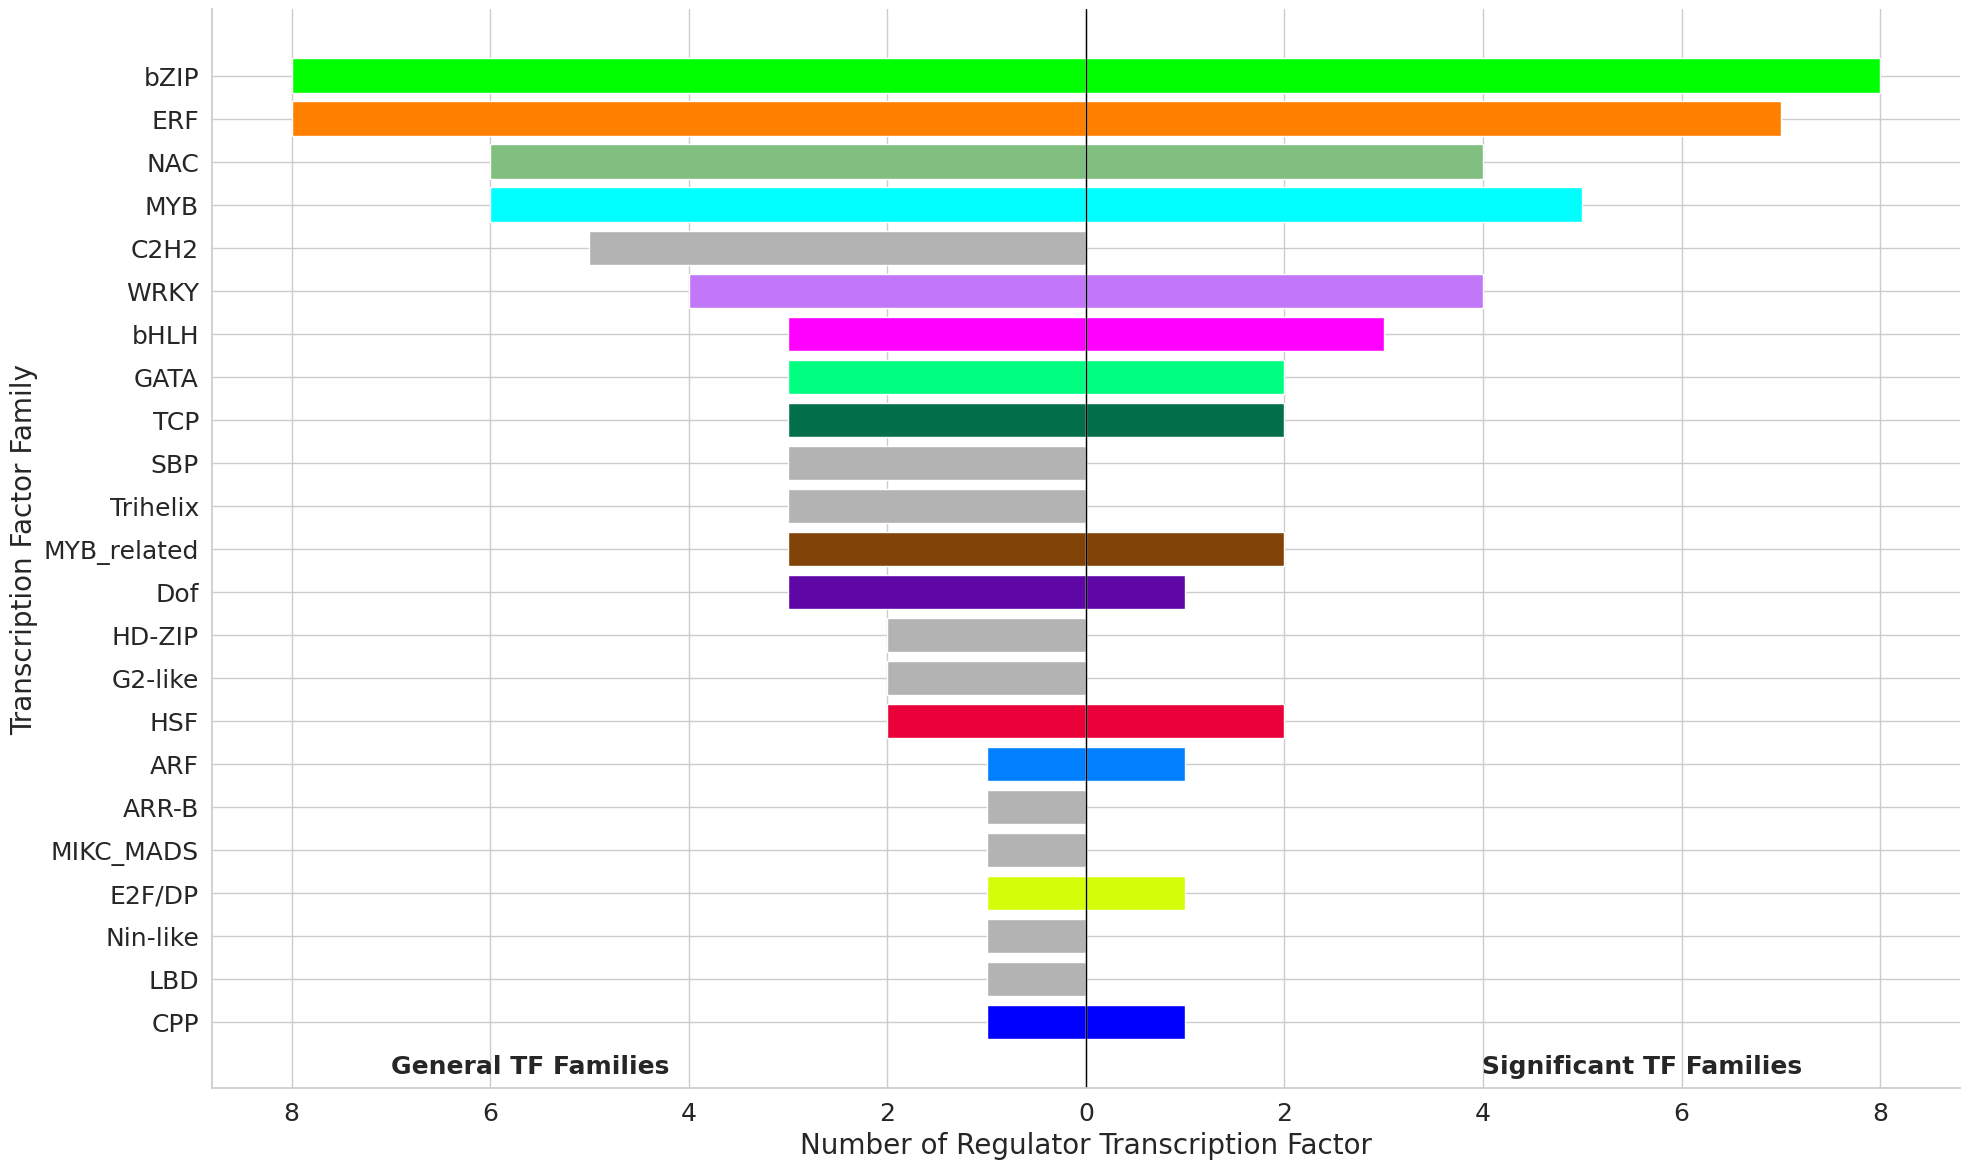

In [36]:
# Count all TF family occurrences (general dataset)
general_family_counts = Tf_info['Family'].value_counts()

# Count only significant TF occurrences
significant_family_counts = signif_tf['Family'].value_counts()

# Sort families by total count (general) to define order
sorted_families = general_family_counts.sort_values(ascending=False).index

# Align significant counts to this order, fill missing values with 0
significant_family_counts = significant_family_counts.reindex(sorted_families, fill_value=0)

# Align general counts (already sorted)
general_family_counts = general_family_counts.reindex(sorted_families)

# Ensure colors match sorted families
sorted_colors = [extended_family_color_dict[family] for family in sorted_families]

# Create the butterfly plot
fig, ax = plt.subplots(figsize=(20, 12))

# Left side: General TF families (plotted as negative but displayed as positive)
ax.barh(sorted_families, -general_family_counts, color=sorted_colors, label="All Regulator TF Families")

# Right side: Significant TF families (plotted normally)
ax.barh(sorted_families, significant_family_counts, color=sorted_colors, label="Significant Regulator TF Families")

# Formatting
ax.set_xlabel("Number of Regulator Transcription Factor", fontsize=20)
ax.set_ylabel("Transcription Factor Family", fontsize=20)
ax.axvline(0, color='black', linewidth=1)  # Vertical line at center

# Add section titles
ax.text(-general_family_counts.max() * 0.7, len(sorted_families) + 0.2, "General TF Families", 
        fontsize=18, fontweight="bold", ha="center")
ax.text(significant_family_counts.max() * 0.7, len(sorted_families) + 0.2, "Significant TF Families", 
        fontsize=18, fontweight="bold", ha="center")

# Adjust x-axis labels to display positive values
xticks = ax.get_xticks()
ax.set_xticklabels([str(abs(int(x))) for x in xticks], fontsize = 18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 18)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

plt.gca().invert_yaxis()  # Keep highest count at top
plt.tight_layout()
plt.savefig('./Fig3_A.svg', format='svg')
plt.show()

/tmp/ipykernel_60453/2323479269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upsetplot_data_only_activity['Groups'] = upsetplot_data_only_activity['Groups'].str.replace('_pval','', regex=False)
/tmp/ipykernel_60453/2323479269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upsetplot_data_only_activity['Groups'] = upsetplot_data_only_activity['Groups'].str.split(' & ')


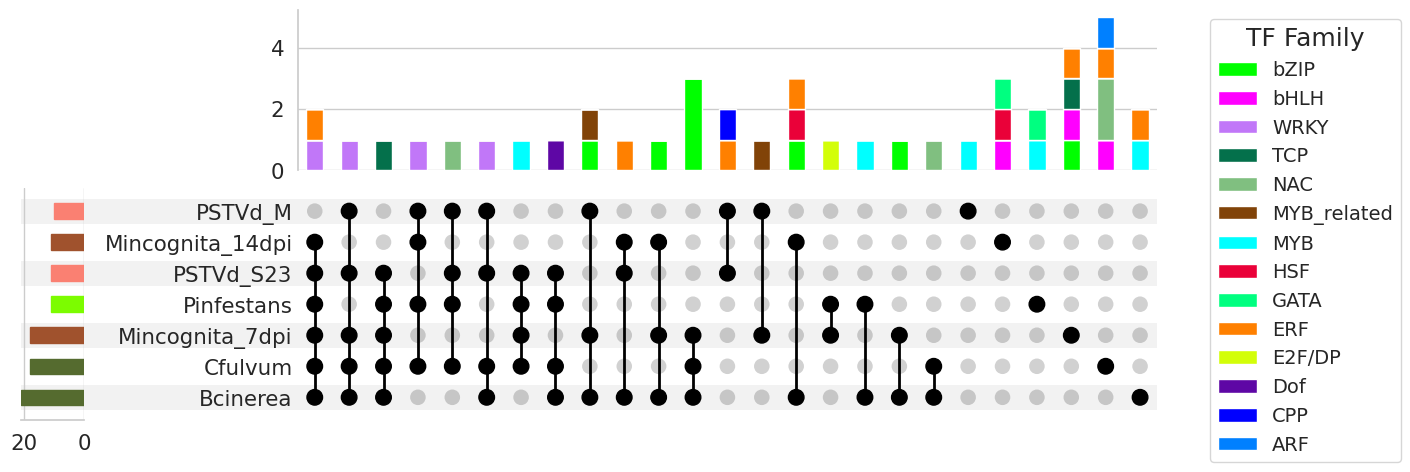

In [37]:
upsetplot_data = Tf_info.reset_index()
upsetplot_data = upsetplot_data[~upsetplot_data['Groups'].isna()]
upsetplot_data_only_activity = upsetplot_data[['OLN','Groups']]
upsetplot_data_only_activity['Groups'] = upsetplot_data_only_activity['Groups'].str.replace('_pval','', regex=False)
upsetplot_data_only_activity['Groups'] = upsetplot_data_only_activity['Groups'].str.split(' & ')
group_dict_only_acts = {}
for _, row in upsetplot_data_only_activity.iterrows():
    for group in row['Groups']:
        if group not in group_dict_only_acts:
            group_dict_only_acts[group] = []
        group_dict_only_acts[group].append(row['OLN'])
# Generate the from_contents DataFrame
upset_data = from_contents(group_dict_only_acts)
family_tf = Tf_info['Family']
upset_data = pd.merge(upset_data, family_tf, left_on=['id'], right_index=True)
# Create the UpSet plot
upset = UpSet(upset_data,  sort_by='-degree', intersection_plot_elements=0)
upset.style_categories(
    ["Mincognita_7dpi", "Mincognita_14dpi"], bar_facecolor="sienna")
upset.style_categories(
    ["PSTVd_M", "PSTVd_S23"], bar_facecolor="salmon")
upset.style_categories(
    ["Bcinerea", "Cfulvum"], bar_facecolor="darkolivegreen")
upset.style_categories(
    ["Pinfestans"], bar_facecolor="lawngreen")
upset.add_stacked_bars(by='Family', colors=extended_family_color_dict, elements=5)

# Plot the UpSet plot
plot = upset.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='TF Family', title_fontsize=18, fontsize=14)    
plt.savefig('./Fig3_C.svg', bbox_inches='tight', format='svg')
plt.show()

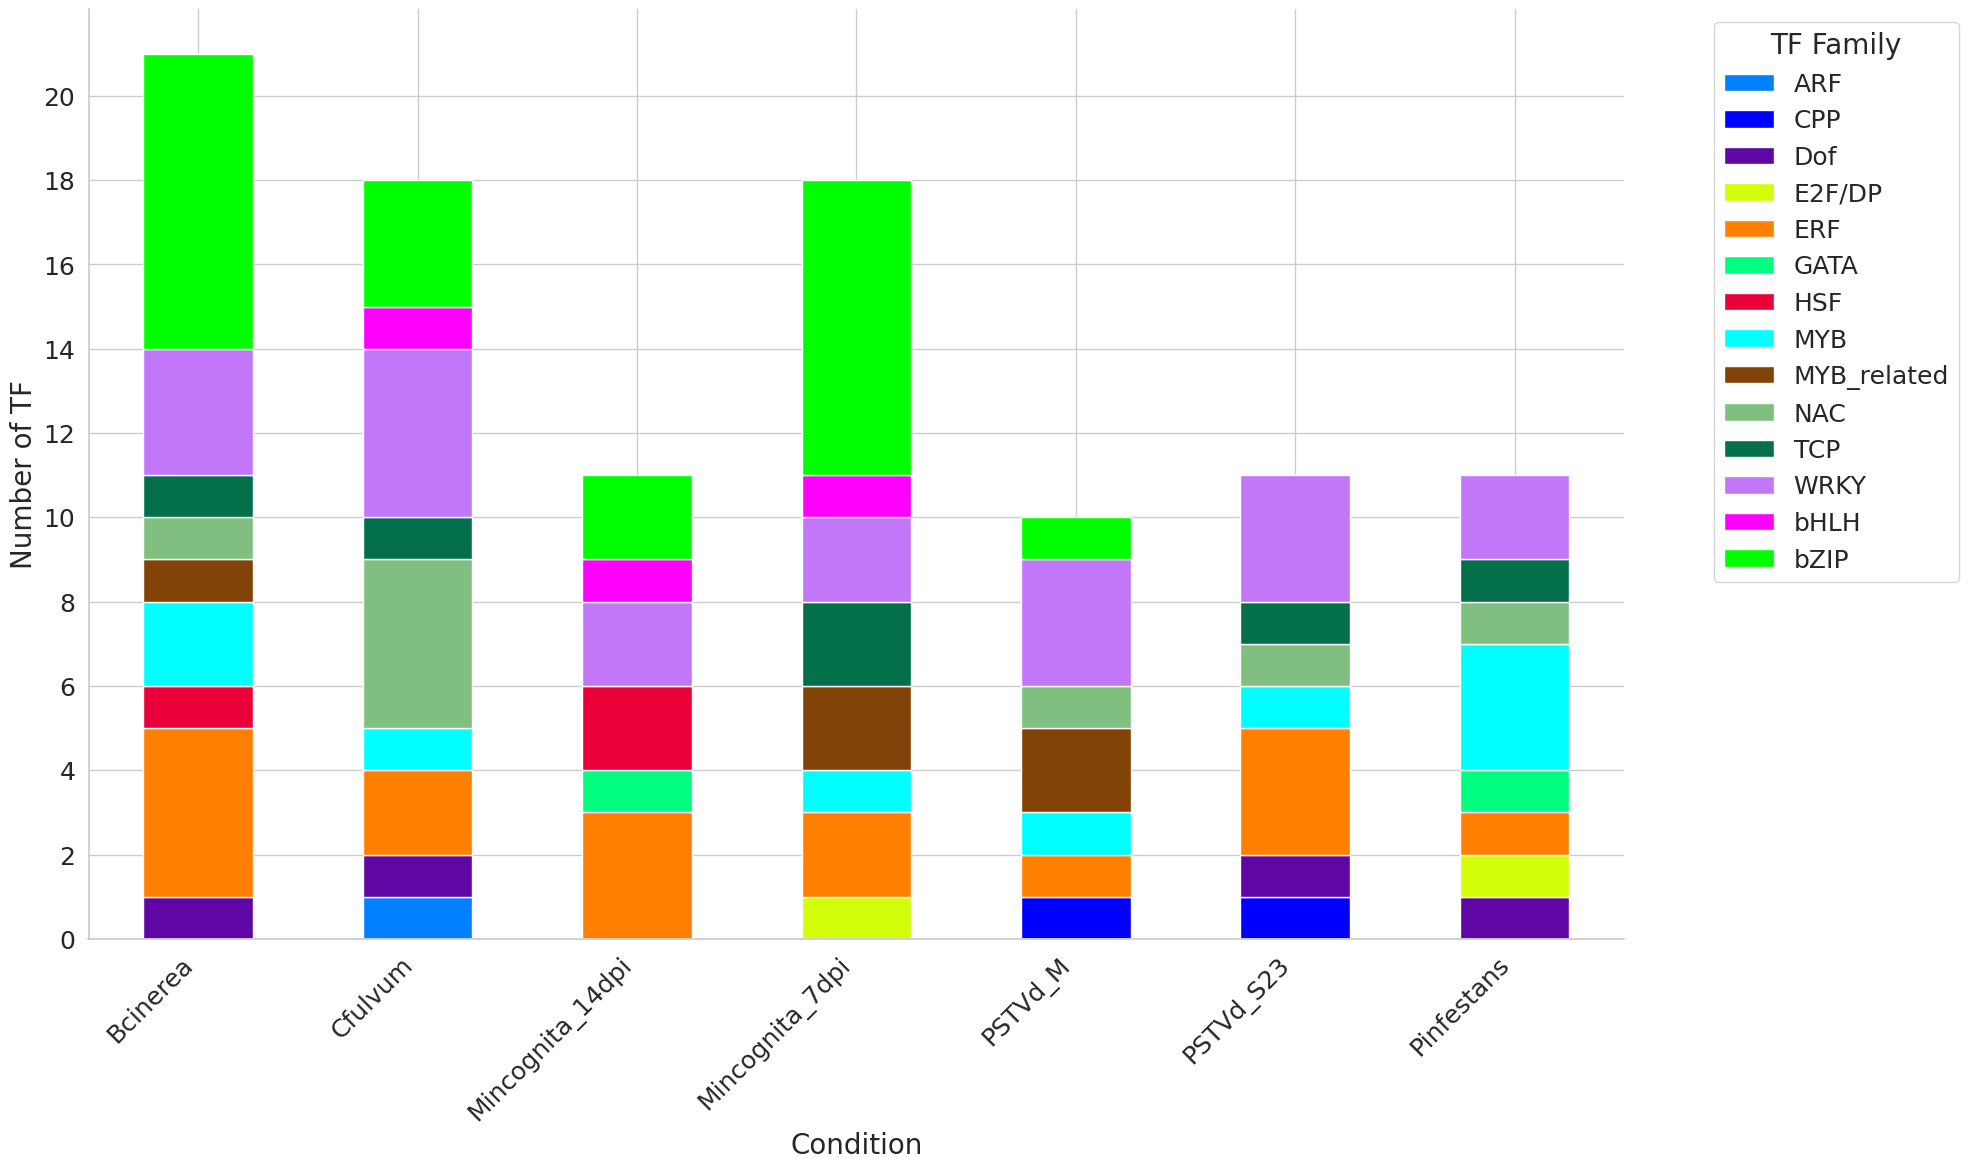

In [38]:
df = signif_tf.reset_index()[['OLN','Family','Groups']].drop_duplicates()
df['Groups']=df['Groups'].str.replace('_pval','', regex=False)
# Split the 'Groups' column into separate conditions by '&' and explode them
df['Groups'] = df['Groups'].str.split('&')
df_exploded = df.explode('Groups')

# Strip extra whitespace
df_exploded['Groups'] = df_exploded['Groups'].str.strip()

# Count the occurrences of each Family within each Condition
plot_data = df_exploded.groupby(['Groups', 'Family']).size().unstack(fill_value=0)

# Map the family colors to the plot data
family_colors = plot_data.columns.map(extended_family_color_dict)

# Create the stacked barplot with custom colors
ax = plot_data.plot(kind='bar', stacked=True, figsize=(20, 12), color=family_colors)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
# Set plot labels and title

plt.xlabel('Condition', fontsize=20)
plt.ylabel('Number of TF', fontsize = 20)
plt.xticks(rotation=45, ha='right', fontsize = 18)
plt.yticks(fontsize = 18)
ax.set_yticks(range(0, 21, 2))
plt.legend(title='TF Family', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=20, fontsize=18)
plt.tight_layout()

# Show the plot
# plt.savefig('./Plot/Fig3_B.svg', format='svg')
plt.show()

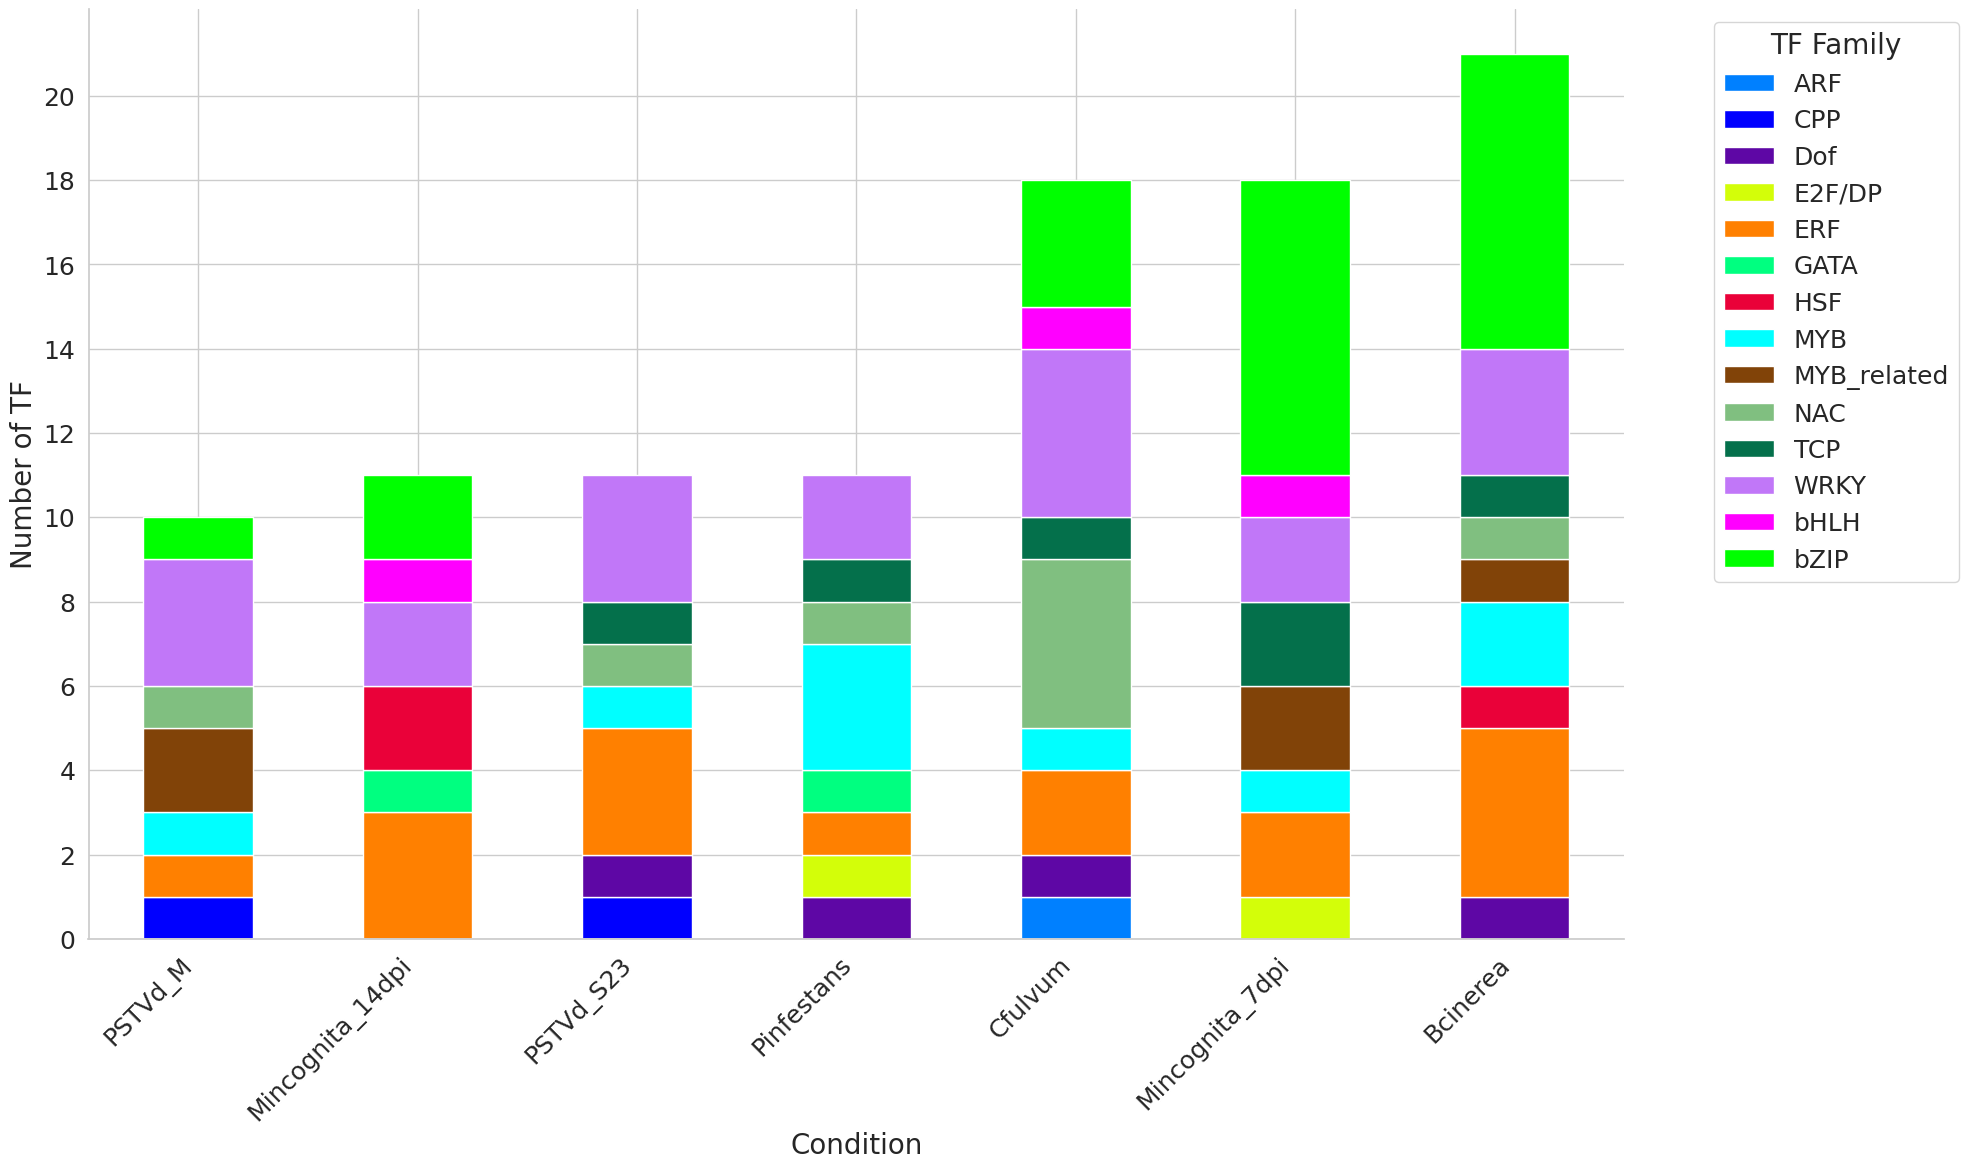

In [39]:
df = signif_tf.reset_index()[['OLN','Family','Groups']].drop_duplicates()
df['Groups'] = df['Groups'].str.replace('_pval', '', regex=False)

# Split the 'Groups' column into separate conditions by '&' and explode them
df['Groups'] = df['Groups'].str.split('&')
df_exploded = df.explode('Groups')

# Strip extra whitespace
df_exploded['Groups'] = df_exploded['Groups'].str.strip()

# Count the occurrences of each Family within each Condition
plot_data = df_exploded.groupby(['Groups', 'Family']).size().unstack(fill_value=0)

# **Step 1: Compute total TF count per condition**
total_tf_per_condition = plot_data.sum(axis=1)

# **Step 2: Sort conditions by total TF count (ascending)**
sorted_conditions = total_tf_per_condition.sort_values().index

# **Step 3: Reorder plot_data based on sorted conditions**
plot_data = plot_data.loc[sorted_conditions]

# Map the family colors to the plot data
family_colors = plot_data.columns.map(extended_family_color_dict)

# **Step 4: Plot**
ax = plot_data.plot(kind='bar', stacked=True, figsize=(20, 12), color=family_colors)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

# Set plot labels and title
plt.xlabel('Condition', fontsize=20)
plt.ylabel('Number of TF', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)
ax.set_yticks(range(0, 21, 2))
plt.legend(title='TF Family', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=20, fontsize=18)
plt.tight_layout()

# Show the plot
plt.savefig('./Fig3_B.svg', format='svg')
plt.show()

In [40]:
conditions = ['Pinfestans','Cfulvum','PSTVd_S23','PSTVd_M','Bcinerea','Mincognita_7dpi','Mincognita_14dpi']
expr = 'stats_'
expression = [expr + sample for sample in conditions]
# padj = 'padj_'
# padjs = [padj + sample for sample in conditions]
acts = "_acts"
activity = [sample + acts for sample in conditions]
pval = "_pval"
pvals = [sample + pval for sample in conditions]
Tf_expr = Tf_info[expression]
# TF_padj = Tf_info[padjs]
signif_tf_clusterm = signif_tf.copy()
Tf_activity = Tf_info[activity]
Tf_activity.columns = Tf_activity.columns.str.replace('_acts', '', regex=False)
Tf_pval = Tf_info[pvals]
Tf_activity_signif = Tf_activity[Tf_activity.index.isin(signif_tf.index)]
Tf_activity = Tf_activity.dropna(how='any')
Tf_expr_signif = Tf_expr[Tf_expr.index.isin(Tf_activity.index)]

In [41]:
# # Step 1: Define sample types based on sample names
# sample_names = Tf_activity.columns  # Assuming this contains your sample names
# sample_types = []

# # Manually define sample types based on your naming convention
# for name in sample_names:
#     if "incognita" in name.lower():
#         sample_types.append("RKN")
#     elif "pstvd" in name.lower():
#         sample_types.append("Virus")
#     elif "infestans" in name.lower():
#         sample_types.append("Oomycete")
#     else:
#         sample_types.append("Fungus")

# # Step 2: Create a color palette for sample types
# sample_type_colors = {
#     "RKN": "sienna",
#     "Virus": "salmon",
#     "Oomycete": "lawngreen",
#     "Fungus": "darkolivegreen"
# }

# # Map the colors based on sample types
# col_colors = [sample_type_colors[sample_types[i]] for i in range(len(sample_types))]

# # Convert col_colors to a DataFrame
# col_colors_df = pd.DataFrame(col_colors, index=sample_names, columns=['Pathogen Type'])

# # Map each gene family in `row_colors` using `color_dict`
# row_colors = Tf_info['Family'].map(extended_family_color_dict)
# # Create the clustermap
# g = sns.clustermap(
#     Tf_activity,
#     cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
#     col_cluster=True,
#     row_cluster=True,
#     center=0,
#     cbar_kws={'label': 'TF ULM activity'},
#     method='average',
#     metric='correlation',
#     row_colors=row_colors,
#     col_colors=col_colors_df['Pathogen Type'],
#     figsize=(14, 12),
#     yticklabels=False,
#     vmin=-5,
#     vmax=5
# )

# g.ax_heatmap.set(ylabel="")
# g.ax_row_colors.set_aspect('auto')
# # Retrieve the order of columns after clustering
# ordered_indices = g.dendrogram_col.reordered_ind  # Get the order of columns

# # Overlay sample type labels for each column color
# for idx, ordered_idx in enumerate(ordered_indices):
#     sample_type = sample_types[ordered_idx]  # Get the correct sample type
#     color = sample_type_colors[sample_type]  # Get the corresponding color for the sample type
#     g.ax_col_colors.text(
#         idx + 0.5, 0.5, sample_type, ha='center', va='center', color='black',  # Text color set to black
#         fontsize=8, weight='bold'
#     )

# # Retrieve the order of rows after clustering
# ordered_row_indices = g.dendrogram_row.reordered_ind
# ordered_families = Tf_info['Family'].iloc[ordered_row_indices].values

# # --- Step 1: Create a Legend for TF Families ---
# # Get unique families and their corresponding colors
# unique_families = sorted(set(ordered_families), key=lambda x: list(extended_family_color_dict.keys()).index(x))
# legend_handles = [Patch(facecolor=extended_family_color_dict[fam], label=fam) for fam in unique_families]

# # --- Step 2: Add the Legend to the Figure ---
# plt.legend(handles=legend_handles, title="TF Family", bbox_to_anchor=(0, 0), loc='upper right', fontsize=18, title_fontsize=20, facecolor=None)

# # Save and show the plot
# g.savefig("./Results/Clean_plot/Clustermap_all_tf_acts.svg", bbox_inches='tight', format='svg')
# plt.show()

In [42]:

# # Step 1: Define sample types based on sample names
# sample_names = Tf_activity.columns  # Assuming this contains your sample names
# sample_types = []

# # Manually define sample types based on your naming convention
# for name in sample_names:
#     if "incognita" in name.lower():
#         sample_types.append("RKN")
#     elif "pstvd" in name.lower():
#         sample_types.append("Virus")
#     elif "infestans" in name.lower():
#         sample_types.append("Oomycete")
#     else:
#         sample_types.append("Fungus")

# # Step 2: Create a color palette for sample types
# sample_type_colors = {
#     "RKN": "sienna",
#     "Virus": "salmon",
#     "Oomycete": "lawngreen",
#     "Fungus": "darkolivegreen"
# }

# # Map the colors based on sample types
# col_colors = [sample_type_colors[sample_types[i]] for i in range(len(sample_types))]

# # Convert col_colors to a DataFrame
# col_colors_df = pd.DataFrame(col_colors, index=sample_names, columns=['Pathogen Type'])

# # Map each gene family in `row_colors` using `color_dict`
# row_colors = Tf_info['Family'].map(extended_family_color_dict)
# # Create the clustermap
# g = sns.clustermap(
#     Tf_activity,
#     cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
#     col_cluster=True,
#     row_cluster=True,
#     center=0,
#     cbar_kws={'label': 'TF ULM activity'},
#     cbar_pos=(0.02,0.8,0.02,0.18),
#     method='average',
#     metric='correlation',
#     row_colors=row_colors,
#     col_colors=col_colors_df['Pathogen Type'],
#     figsize=(14, 12),
#     yticklabels=False,
#     vmin=-5,
#     vmax=5
# )

# g.ax_heatmap.set(ylabel="")
# g.ax_row_colors.set_aspect('auto')
# # Retrieve the order of columns after clustering
# ordered_indices = g.dendrogram_col.reordered_ind  # Get the order of columns

# # Overlay sample type labels for each column color
# for idx, ordered_idx in enumerate(ordered_indices):
#     sample_type = sample_types[ordered_idx]  # Get the correct sample type
#     color = sample_type_colors[sample_type]  # Get the corresponding color for the sample type
#     g.ax_col_colors.text(
#         idx + 0.5, 0.5, sample_type, ha='center', va='center', color='black',  # Text color set to black
#         fontsize=15, weight='bold'
#     )

# # Retrieve the order of rows after clustering
# ordered_row_indices = g.dendrogram_row.reordered_ind
# ordered_families = Tf_info['Family'].iloc[ordered_row_indices].values

# # --- Step 1: Create a Legend for TF Families ---
# # Get unique families and their corresponding colors
# unique_families = sorted(set(ordered_families), key=lambda x: list(extended_family_color_dict.keys()).index(x))
# legend_handles = [Patch(facecolor=extended_family_color_dict[fam], label=fam) for fam in unique_families]

# # --- Step 2: Add the Legend to the Figure ---
# plt.legend(handles=legend_handles, title="TF Family", bbox_to_anchor=(0, 0), loc='upper right', fontsize=18, title_fontsize=20, facecolor=None)

# # Save and show the plot
# g.savefig("./Results/Clean_plot/Clustermap_all_tf_acts.svg", bbox_inches='tight', format='svg')
# plt.show()

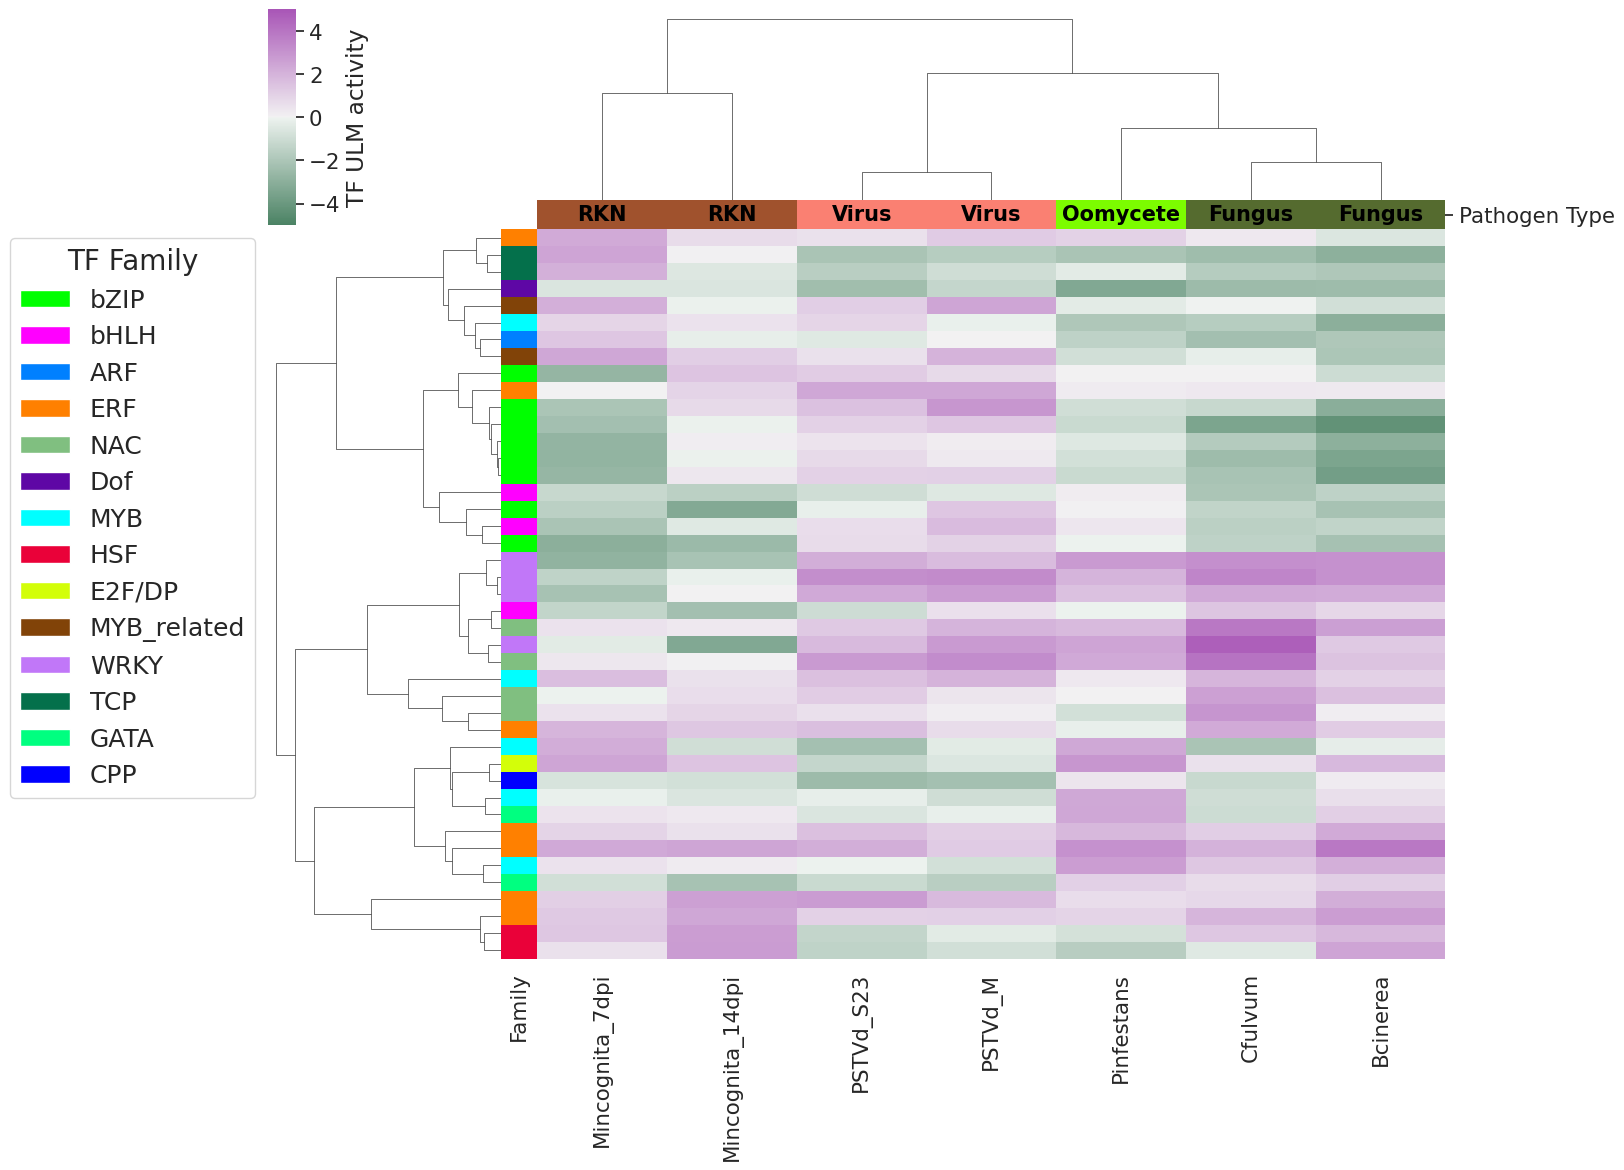

In [43]:

# Step 1: Define sample types based on sample names
sample_names = Tf_activity_signif.columns  # Assuming this contains your sample names
sample_types = []

# Manually define sample types based on your naming convention
for name in sample_names:
    if "incognita" in name.lower():
        sample_types.append("RKN")
    elif "pstvd" in name.lower():
        sample_types.append("Virus")
    elif "infestans" in name.lower():
        sample_types.append("Oomycete")
    else:
        sample_types.append("Fungus")

# Step 2: Create a color palette for sample types
sample_type_colors = {
    "RKN": "sienna",
    "Virus": "salmon",
    "Oomycete": "lawngreen",
    "Fungus": "darkolivegreen"
}

# Map the colors based on sample types
col_colors = [sample_type_colors[sample_types[i]] for i in range(len(sample_types))]

# Convert col_colors to a DataFrame
col_colors_df = pd.DataFrame(col_colors, index=sample_names, columns=['Pathogen Type'])

# Map each gene family in `row_colors` using `color_dict`
row_colors = Tf_info['Family'].map(extended_family_color_dict)
# Create the clustermap
g = sns.clustermap(
    Tf_activity_signif,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    col_cluster=True,
    row_cluster=True,
    center=0,
    cbar_kws={'label': 'TF ULM activity'},
    cbar_pos=(0.02,0.8,0.02,0.18),
    method='average',
    metric='correlation',
    row_colors=row_colors,
    col_colors=col_colors_df['Pathogen Type'],
    figsize=(14, 12),
    yticklabels=False,
    vmin=-5,
    vmax=5
)

g.ax_heatmap.set(ylabel="")
g.ax_row_colors.set_aspect('auto')
# Retrieve the order of columns after clustering
ordered_indices = g.dendrogram_col.reordered_ind  # Get the order of columns

# Overlay sample type labels for each column color
for idx, ordered_idx in enumerate(ordered_indices):
    sample_type = sample_types[ordered_idx]  # Get the correct sample type
    color = sample_type_colors[sample_type]  # Get the corresponding color for the sample type
    g.ax_col_colors.text(
        idx + 0.5, 0.5, sample_type, ha='center', va='center', color='black',  # Text color set to black
        fontsize=15, weight='bold'
    )

# Retrieve the order of rows after clustering
ordered_row_indices = g.dendrogram_row.reordered_ind
ordered_families = signif_tf['Family'].iloc[ordered_row_indices].values

# --- Step 1: Create a Legend for TF Families ---
# Get unique families and their corresponding colors
unique_families = sorted(set(ordered_families), key=lambda x: list(extended_family_color_dict.keys()).index(x))
legend_handles = [Patch(facecolor=extended_family_color_dict[fam], label=fam) for fam in unique_families]

# --- Step 2: Add the Legend to the Figure ---
plt.legend(handles=legend_handles, title="TF Family", bbox_to_anchor=(0, 0), loc='upper right', fontsize=18, title_fontsize=20, facecolor=None)

# Save and show the plot
g.savefig("./Fig3_D.svg", bbox_inches='tight', format='svg')
plt.show()

In [45]:
Tf_info

,gene.description,Family,Gene_Name,stats_Pinfestans,stats_Cfulvum,stats_PSTVd_S23,stats_PSTVd_M,stats_Bcinerea,stats_Mincognita_7dpi,stats_Mincognita_14dpi,...,Mincognita_7dpi_acts,Mincognita_14dpi_acts,Pinfestans_pval,Cfulvum_pval,PSTVd_S23_pval,PSTVd_M_pval,Bcinerea_pval,Mincognita_7dpi_pval,Mincognita_14dpi_pval,Groups
OLN,,,,,,,,,,,,,,,,,,,,,
Solyc01g065540,Two-component response regulator (AHRD V3.3 **...,ARR-B,mRNA:Solyc01g065540.3.1,-4.455095,0.180276,-1.750119,-1.426726,-2.656717,1.488227,-0.471908,...,0.269178,0.156054,0.815674,0.987131,0.449494,0.977352,0.469479,0.787824,0.876008,NaN
Solyc01g087990,MADS-box transcription factor (AHRD V3.3 *** Q...,MIKC_MADS,mRNA:Solyc01g087990.3.1,4.221559,1.444226,-4.224183,-2.188224,10.798838,11.264234,5.253115,...,-0.430568,-0.628163,0.124423,0.466767,0.671175,0.561975,0.763080,0.666835,0.529978,NaN
Solyc01g095460,Common plant regulatory factor.1,bZIP,mRNA:Solyc01g095460.3.1,5.347496,0.349682,0.460056,4.692626,-9.241774,-1.461664,-0.264977,...,-2.296450,-0.093641,0.257539,0.000556,0.302659,0.171252,0.000022,0.021766,0.925405,Cfulvum_pval & Bcinerea_pval & Mincognita_7dpi...
Solyc01g102300,bHLH transcription factor 006,bHLH,mRNA:Solyc01g102300.3.1,1.883307,-3.504408,1.285751,-0.774195,-2.619212,-0.495411,6.133160,...,-1.174669,-1.544044,0.858100,0.038775,0.339475,0.629910,0.147998,0.240284,0.122755,Cfulvum_pval
Solyc01g103050,Auxin Response Factor 1,ARF,mRNA:Solyc01g103050.3.1,-1.672017,1.730622,4.837247,4.507532,-0.539530,-5.236647,-1.999754,...,1.380440,-0.195754,0.144473,0.022250,0.655712,0.970936,0.051857,0.167624,0.844825,Cfulvum_pval
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc12g009240,Ethylene-responsive transcription factor (AHRD...,ERF,mRNA:Solyc12g009240.1.1,-3.683484,-2.199671,-5.654960,-3.787333,2.603858,-14.982686,0.674523,...,0.946551,0.522680,0.064293,0.244384,0.109479,0.261269,0.022345,0.343996,0.601262,Bcinerea_pval
Solyc12g014610,WRKY transcription factor 20,WRKY,mRNA:Solyc12g014610.2.1,-3.560581,-2.902872,1.583213,0.172954,-6.639553,-4.153884,-2.706400,...,-2.175948,0.010814,0.119845,0.021041,0.019712,0.006618,0.023631,0.029690,0.991373,Cfulvum_pval & PSTVd_S23_pval & PSTVd_M_pval &...
Solyc12g077540,Trihelix transcription factor GT.1,Trihelix,mRNA:Solyc12g077540.3.1,-1.362655,0.186735,1.627094,1.444984,-1.499088,0.434582,1.349819,...,-0.581716,-0.500244,0.982206,0.505469,0.523959,0.177163,0.948274,0.560831,0.616965,NaN


In [50]:
tf_activity = Tf_info[activity]
tf_activity.fillna(0, inplace=True)

/tmp/ipykernel_60453/751934929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_activity.fillna(0, inplace=True)


In [52]:
tf_stats = Tf_info[expression]

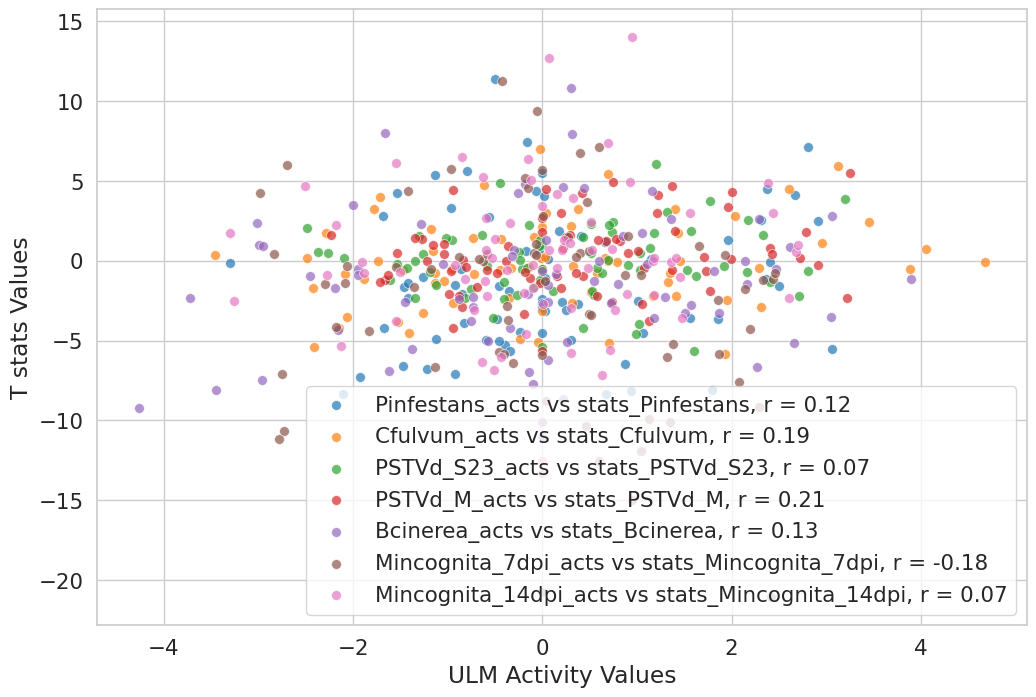

In [ ]:
plt.rcParams['svg.fonttype'] = 'none'
# Create a figure for scatter plots
plt.figure(figsize=(12, 8))

# Define a color palette
color_palette = sns.color_palette("tab10", n_colors=len(tf_activity.columns))
# List to hold legend labels
legend_labels = []

# Loop through the columns of hubs_activity
for i, column in enumerate(tf_activity.columns):
    # Split the column name to get the first two parts
    parts = column.split('_')
    
    # Construct the corresponding column name based on the number of parts
    if len(parts) == 2:
        # For columns with one separator
        corresponding_column = f"stats_{parts[0]}"
    elif len(parts) == 3:
        # For columns with two separators
        corresponding_column = f"stats_{parts[0]}_{parts[1]}"
    else:
        # Skip if the column name doesn't match expected patterns
        print(f"Warning: Unexpected column name format for {column}")
        continue

    # Debugging: Check if the constructed column exists in logfc
    if corresponding_column in tf_stats.columns:  
        x = tf_activity[column]
        y = tf_stats[corresponding_column]
        
        # Define the color for the current group
        color = color_palette[i]
        
        # Calculate the correlation
        correlation_value = x.corr(y)
        
        # Plot scatter
        # plt.scatter(x, y, alpha=0.6, color=color)
        sns.scatterplot(x=x, y=y, color=color, label=f'{column} vs {corresponding_column}', alpha=0.7,s=50)
        
        # Create the legend label with the correlation value
        legend_labels.append(f'{column} vs {corresponding_column}, r = {correlation_value:.2f}')
    else:
        print(f"Warning: {corresponding_column} not found in logfc")

# Customize the plot

plt.xlabel("ULM Activity Values")
plt.ylabel("T stats Values")

# Create the legend with the correlation values
plt.legend(labels=legend_labels, loc='best')

plt.savefig('./Correlation_stats_activity.svg', format='svg')
plt.show()